In [ ]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import requests
import pathlib
from pathlib import Path

### Set up the default size or style if you are working with one kind of data

In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Get data

In [ ]:
dataset_link = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"

# Set up the paths
data_path = Path("data/")
dataset_path = data_path / "medical_df"

if dataset_path.is_dir():
  print(f"{dataset_path} already exists, skipping creation")
else:
  print(f"{dataset_path} does not exist, creating one...")
  dataset_path.mkdir(parents = True, exist_ok = True)

# Download the dataset
with open(dataset_path / "insuranve.csv", "wb") as f:
  request = requests.get(dataset_link)
  print("Downloading insurace.csv dataset")
  f.write(request.content)

data/medical_df already exists, skipping creation


In [ ]:
medical_df = pd.read_csv("/content/data/medical_df/insuranve.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Age**

* The minimum age in the dataset is 18 and the maximum is 64.

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x = "age",
                   marginal = "box",
                   nbins = 47,
                   title = "Distribution of Age")
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of ages in the dataset is almost uniform except for ages 18 and 19 which seems to have as many customers as other ages.

### **Body Mass Index**
Look into **BMI** of customers and try to understand it

In [ ]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = "box",
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = 'box',
                   color = "smoker",
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = 'box',
                   color = "sex",
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = 'box',
                   color = "region",
                   color_discrete_sequence = ['red', 'green', 'blue', 'yellow'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df, x = "smoker", color = "sex", title = "Smoker")

In [ ]:
fig = px.scatter(medical_df,
                 x = "age",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.4,
                 hover_data = ['sex'],
                 title = 'Age VS Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                 x = "bmi",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.4,
                 hover_data = ['sex'],
                 title = 'BMI VS Charges')
fig.update_traces(marker_size = 5)
fig.show()

When you turn on yes for smoker, you realise that there is a upward trend. As the BMI increases the charges incurred also increases.
We can get some value of information from this.

In [ ]:
px.violin(medical_df, x = "children", y = "charges")

### **Correlation**
We can tell that the value in some columns are more closely related to the values in "charges" compared to other columns e.g, "age" and "charges" are seem to be growing together whereas "bmi" and "charges" don't

This relationship is often expressed numerally using a measure called the correlation coefficient, which can be computed using the `.corr` method of pandas series

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [ ]:
px.scatter(medical_df, x = "age", y = "age")

In [ ]:
medical_df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

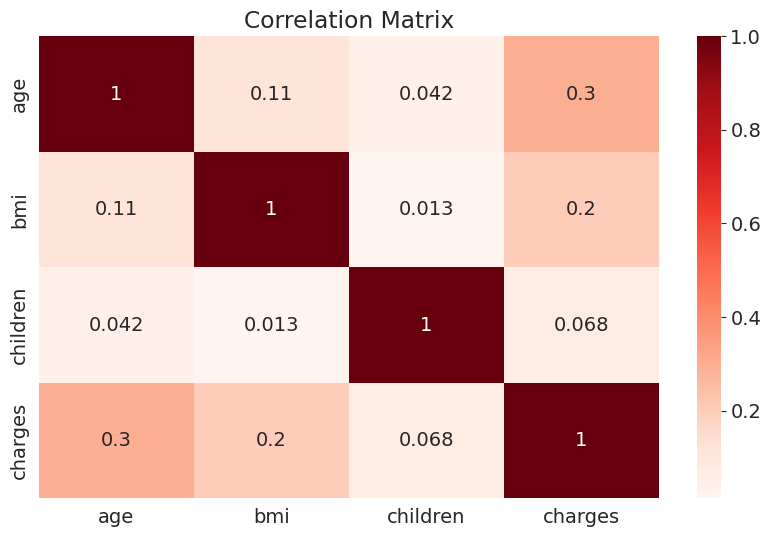

In [ ]:
sns.heatmap(medical_df.corr(numeric_only = True), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

## Linear Regression using a Single Feature

We know that the "smoker" and "age" columns have the strongest correlation with "charges".
Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers

In [ ]:
non_smokers_df = medical_df[medical_df.smoker == "no"]
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age VS Charges'}, xlabel='age', ylabel='charges'>

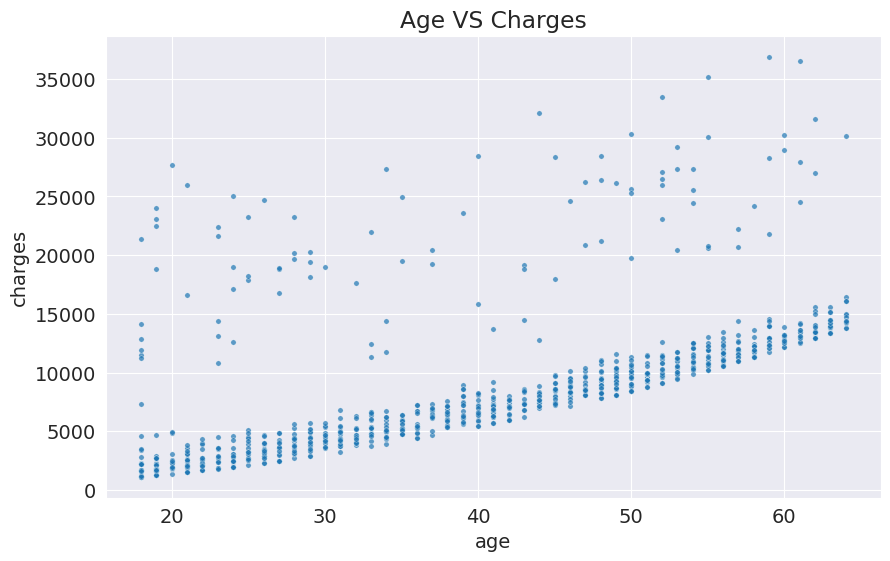

In [ ]:
plt.title("Age VS Charges")
sns.scatterplot(data = non_smokers_df, x = 'age',
                y = 'charges',
                alpha = 0.7,
                s = 15)

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

Let's guess the values of `w` and `b` and use them to estimate the value of charges

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smokers_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


We can compare them with the actual data

In [ ]:
non_smokers_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


The answers are pretty bad, so our guess of `w` and `b` was very wrong

Text(0, 0.5, 'Estimated Charges')

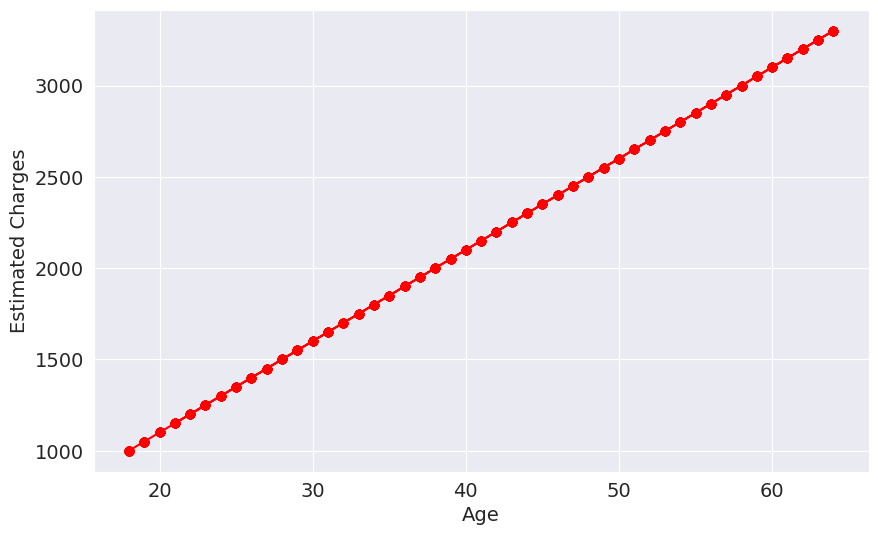

In [ ]:
plt.plot(ages, estimated_charges, "r-o")
plt.xlabel("Age")
plt.ylabel("Estimated Charges")

We have assumed a linear relationship between them, which is correctly shown here

We can overlay this line with the actual data and see how well our model fits the data

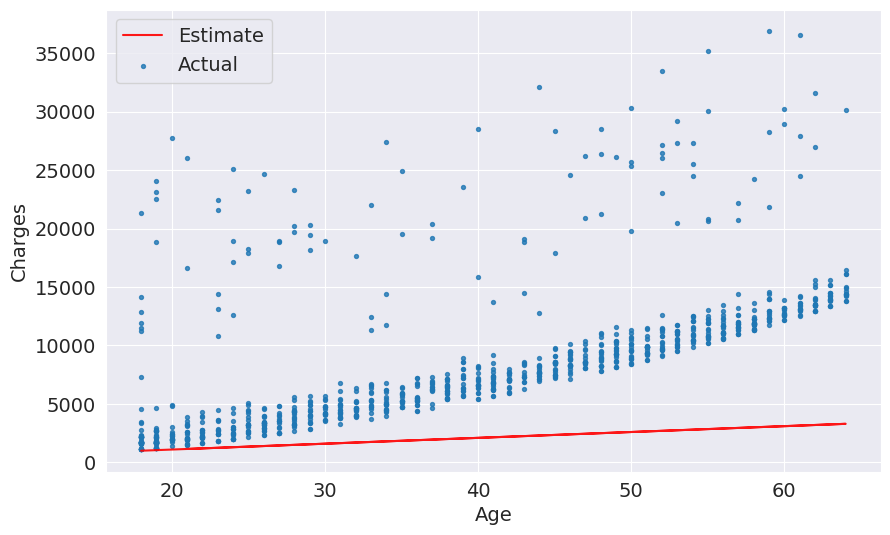

In [ ]:
target = non_smokers_df.charges

plt.plot(ages, estimated_charges, "r", alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])

Our estimates are quite poor and out line does not fit with the actual data. We can try different values of `w` and `b` to move the line around and try to find the best possible match

In [ ]:
def try_parameters(w, b):
  ages = non_smokers_df.age
  target = non_smokers_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, "r", alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])

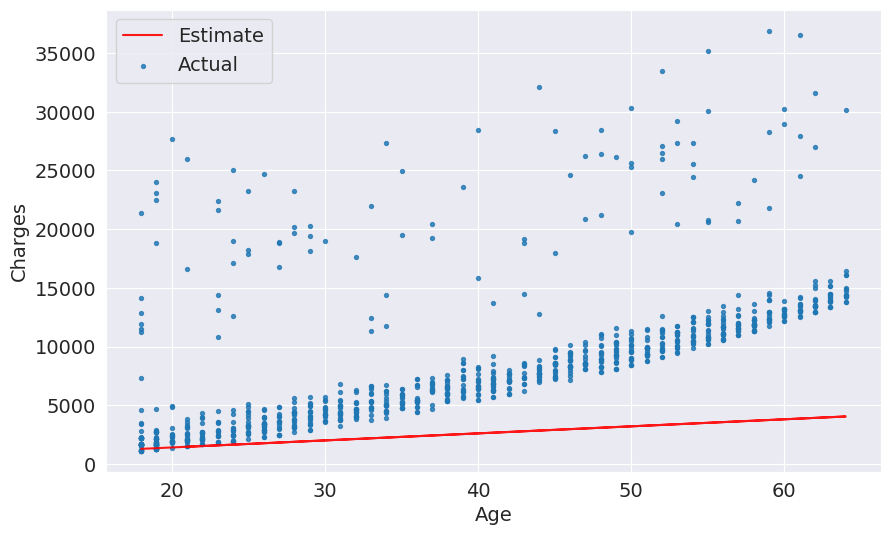

In [ ]:
try_parameters(60, 200)

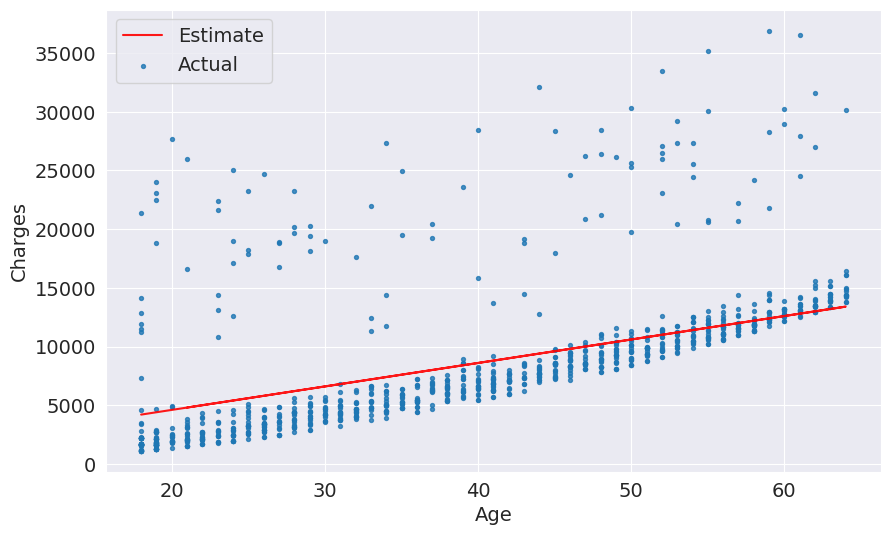

In [ ]:
try_parameters(200, 600)